<a href="https://colab.research.google.com/github/meitalovich/Deep_Learning/blob/main/Ex2_OneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex2 - OneNet Implementation

Sources:

1.   https://github.com/mmaithani/data-science/blob/main/OneNet.ipynb
2.   https://github.com/PeizeSun/OneNet
3.   https://analyticsindiamag.com/onenet/

**Applying:**
Reem Ibrahem & Meital Mendelovich 

# **Implementation**

**1.** install torchvision using below command:


In [ ]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 17 kB/s 
     |████████████████████████████████| 12.8 MB 33.2 MB/s 
     |████████████████████████████████| 7.6 MB 4.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch

**2.** install the current version of pyyaml and pycocotools.

Check if cuda is available:

In [ ]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [ ]:
import torch, torchvision
from IPython.display import Image
from IPython.display import display

print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


**3.** Clone & Install from source:

In [ ]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [ ]:
cd OneNet


/content/OneNet


In [ ]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/torchscript_patch.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/shared.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/caffe2_export.py -> build/lib.linux-x86_64-3.7/detectron2/export
copying detectron2/export/caffe2_inference.py -> build/lib.linux-x86_64-3.7/detec

**4.** Now, we will pass the section of the training.We will mount to Google drive to get access for a trained model.


**5.** Evaluate:

In [ ]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], resume=False)
[04/27 12:10:03 detectron2]: Rank of current process: 0. World size: 1
[04/27 12:10:04 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/

**6.** Visualize:

We will run the model on several images to see the results.

[get image as input and make an image for the output.]

In [ ]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/classroom1.jpg --output /content/resclass1.jpg --confidence-threshold 0.1 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/classroom2.jpg --output /content/resclass2.jpg --confidence-threshold 0.2 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

[04/27 12:12:05 detectron2]: Arguments: Namespace(confidence_threshold=0.1, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/classroom1.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/resclass1.jpg', video_input=None, webcam=False)
[04/27 12:12:08 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/27 12:12:08 detectron2]: /content/classroom1.jpg: detected 100 instances in 0.25s
100% 1/1 [00:00<00:00,  2.08it/s]
[04/27 12:12:10 detectron2]: Arguments: Namespace(confidence_threshold=0.2, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/classroom2.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/resclass2.jpg', video_input=None, webcam=False)
[04/27 12:12:12 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/27 12:12:12 dete

**Image 1:**

Original:

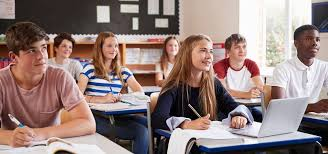

In [ ]:
x = Image(filename='/content/classroom1.jpg') 
display(x)

Output:

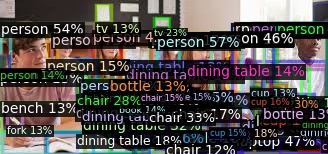

In [ ]:
x = Image(filename='/content/resclass1.jpg') 
display(x)

Original:

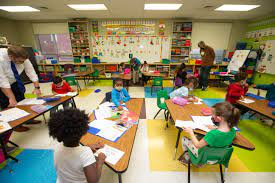

In [ ]:
x = Image(filename='/content/classroom2.jpg') 
display(x)

Output:

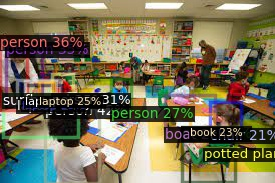

In [ ]:
x = Image(filename='/content/resclass2.jpg') 
display(x)